# Derivation, prototyping and verification of stress resultant calculation

In [1]:
%matplotlib widget
import matplotlib.pylab as plt
from matplotlib import cm
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.dic_crack import\
    DICGrid, DICStateFields, DICCrackList, DICCrack, DICCrackCOR
from bmcs_shear.dic_crack.dic_test_crack import DICTestCrack
from bmcs_shear.dic_crack.dic_stress_profile import DICStressProfile
import numpy as np
np.seterr(divide='ignore', invalid='ignore');

In [2]:
dtc = DICTestCrack()

In [3]:
dtc.sp

In [4]:
dtc.interact()

## Verification of the stress profile values

Access the material properties, assume elastic state and evaluate the stress at individual nodes of a ligament.

In [12]:
dsp.u_La

array([[ 0.03,  0.  ],
       [ 0.01,  0.  ],
       [-0.01,  0.  ],
       [-0.03,  0.  ]])

In [6]:
dsp.bd.matrix_.E_c * dsp.u_La

array([[ 840.,    0.],
       [ 280.,    0.],
       [-280.,    0.],
       [-840.,    0.]])

In [11]:
dsp.bd.matrix_.get_sig_a(np.array([0.1, 0.2]))

array([0.77967061, 7.25129585])

# Center of gravity

$$
 \bar{y} \int_0^{y_\max} \sigma(y) \; \mathrm{d}y = 
 \int_0^{y_\max} \sigma(y) y \; \mathrm{d}y 
$$

$$
 \sigma_i(y) = \sigma_i + \frac{\Delta \sigma_i}{\Delta y_i} (y - y_i)
$$

where
$$
\; \Delta \sigma_i = \sigma_{i+1} - \sigma_i, \; \Delta y_i = y_{i+1} - y_i
$$

$$
 n_i = \int_{y_i}^{y_{i+1}} \sigma_i(y) \; \mathrm{d}y
$$

$$
 m_i = \int_{y_i}^{y_{i+1}} \sigma_i(y) y \; \mathrm{d}y
$$

$$
 \bar{y}_i = \frac{m_i}{n_i}
$$

$$
 \bar{y} = \frac{ \sum_i m_i}{ \sum_i n_i } 
$$

In [11]:
import sympy as sp
sp.init_printing()

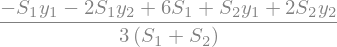

In [12]:
y, S1, S2, y1, y2 = sp.symbols('y, S1, S2, y1, y2')
Y = sp.integrate(S1 + (S2-S1)/(y2-y1)*(y-y1)*y, (y, y1, y2)) / sp.integrate(S1 + (S2-S1)/(y2-y1)*(y-y1),(y, y1, y2))
sp.simplify(Y)

In [13]:
y, S1, S2, y1, y2 = sp.symbols('y, S1, S2, y1, y2')
S = sp.integrate(S1 + (S2 - S1) / (y2 - y1) * (y - y1), (y, y1, y2))
SY = sp.integrate((S1 + (S2 - S1) / (y2 - y1) * (y - y1)) * y, (y, y1, y2))
Y = SY / S
get_Y = sp.lambdify((S1, S2, y1, y2), Y)
get_S = sp.lambdify((S1, S2, y1, y2), S)

In [14]:
n_y = 2
S = np.linspace(0, 3, n_y)
y = np.linspace(0, 3, n_y)

In [15]:
S, y

(array([0., 3.]), array([0., 3.]))

In [16]:
y_L = get_Y(S[:-1], S[1:], y[:-1], y[1:])
S_L = get_S(S[:-1], S[1:], y[:-1], y[1:])
S_L, y_L

(array([4.5]), array([2.]))

In [17]:
sum_n = np.sum(S_L)
sum_m = np.sum(S_L * y_L)
bar_y = sum_m / sum_n
bar_y